Text is everywhere in the form of openions, complaints, news and information; each of us are contributing in generating this text throughout the internet. This large amount of text which is present in the unstructured format can be used for welfare of the society and businesses by analysing the sentiments and trends. A part of NLP deals with Text processing and analysis. Commonly available text can not be directly used for analysis, it needs to pre-processed first, and that is where NLTK, the most popular library for text processing in Python, comes into the picture.

You may check out my previous related work where I have performed NLTK basic operations, Text Pre-processing, explained Bag of Words (BOW) and TF-IDF feature extraction techniques in detail with examples. If you already don't know how BOW and TF-IDF technique works then you must go through the first kernel atleast before proceeding any further.

* _https://www.kaggle.com/amar09/text-pre-processing-and-feature-extraction_
* _https://www.kaggle.com/amar09/nltk-feature-extraction-and-sentiment-analysis_

In this notebook, I am going to perform Sentiment Analysis on tweets on any desired topic. Instead of fetching tweets from and CSV I am going to scrap these tweets from the internet. So, get ready for a crash course on Scraping (using Selenium) and Twitter Sentiment Analysis.

### Actions I am going to perform are:


1. __<a href='#1' target='_self'>Import Libraries</a>__
1. __<a href='#2' target='_self'>Fetch Tweets & Sentiments</a>__
    1. __<a href='#2A' target='_self'>Fetch Tweets</a>__
        1. <a href='#2Aa' target='_self'>Using Selenium</a>
        1. <a href='#2Ab' target='_self'>Using tweepy</a>
    1. __<a href='#2B' target='_self'>Fetch sentiments</a>__
        1. <a href='#2Ba' target='_self'>Using NLTK's SentimentIntensityAnalyzer</a>
        1. <a href='#2Bb' target='_self'>Using TextBlob</a>
1. __<a href='#3' target='_self'>Text Pre-processing</a>__
    1. __<a href='#3A' target='_self'>Pre-processing 'Key Words'</a>__
        1. <a href='#3Aa' target='_self'>Removing '@names'</a>
        1. <a href='#3Ab' target='_self'>Removing links (http | https)</a>
        1. <a href='#3Ac' target='_self'>Removing tweets with empty text</a>
        1. <a href='#3Ad' target='_self'>Dropping duplicate rows</a>
        1. <a href='#3Ae' target='_self'>Removing Punctuations, Numbers and Special characters</a>
        1. <a href='#3Af' target='_self'>Removing Stop words</a>
        1. <a href='#3Ag' target='_self'>Tokenizing</a>
        1. <a href='#3Ah' target='_self'>Converting words to Lemma </a>
        1. <a href='#3i' target='_self'>Joining all tokens into sentences</a>
    1. __<a href='#3B' target='_self'>Pre-processing 'Key Phrases'</a>__
        1. <a href='#3Ba' target='_self'>Setting Grammatical rule to identify phrases</a>
        1. <a href='#3Bb' target='_self'>Creating new feature called 'key_phrases', will contain phrases for corresponding tweet</a>
1. __<a href='#4' target='_self'>Story Generation and Visualization</a>__
    1. __<a href='#4A' target='_self'>Most common words in positive tweets</a>__
    1. __<a href='#4B' target='_self'>Most common words in negative tweets</a>__
    1. __<a href='#4C' target='_self'>Most commonly used Hashtags</a>__
1. __<a href='#5' target='_self'>Feature Extraction</a>__
    1. __<a href='#5A' target='_self'>Feature Extraction for 'Key Words'</a>__
    1. __<a href='#5B' target='_self'>Feature Extraction for 'Key Phrases'</a>__
1. __<a href='#6' target='_self'>Model Building: Sentiment Analysis</a>__
    1. __<a href='#6A' target='_self'>Predictions on 'key words' based features</a>__
        1. <a href='#6Aa' target='_self'> BOW word features</a>
        1. <a href='#6Ab' target='_self'>TF-IDF word features</a>
    1. __<a href='#6B' target='_self'>Predictions on 'key phrases' based features</a>__
        1. <a href='#6Ba' target='_self'>BOW phrase features</a>
        1. <a href='#6Bb' target='_self'>TF-IDF phrase features</a>
       

## <a id='1'>1. Import Libraries</a>

In [1]:
!pip install tweepy

You should consider upgrading via the 'c:\users\wahib\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To mock web-browser and scrap tweets
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# To consume Twitter's API
import tweepy
from tweepy import OAuthHandler 

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wahib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wahib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wahib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wahib\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\wahib\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wahib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

## <a id='2'>2. Fetch Tweets & Sentiments</a>
### <a id='2A'>A. Fetch Tweets</a>
We have two ways two get tweets from tweeter:<br/>
__a. Scrap using Selenium <br/>__
__b. Fetch from twitter API using 'tweepy' <br/>__

I have created classes for both, and any of them can be used. 
Selenium takes around 10 mins to fetch approx 850 tweets which is very slow; If you still are going to use Selenium, then make sure that 'chromedriver' should be locatable, which might not be possible on any cloud notebook platform (I guess).

In [3]:
# keys and tokens from the Twitter Dev Console
consumer_key = 'Sec3MvclRIx2RVlgu9l0SJX6D'
consumer_secret = 'ayoPNWtBm7fWpMBoK6EwRmegu3SW8Rw9mzJkottkv97quPe941'
access_token = '736550752760406018-so5CPJrEbJKb3c3Pq8va3VFr0yk4S0E'
access_token_secret = 'Cgr8tz0h6FTU7kxAjDzpHnjffNTHxWsBytXnu4Ihd1TFb'

In [4]:
class TwitterClient(object): 
    def __init__(self): 
        #Initialization method. 
        try: 
            # create OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            # add hyper parameter 'proxy' if executing from behind proxy "proxy='http://172.22.218.218:8085'"
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Tweeter Authentication Failed - \n{str(e)}")

    def get_tweets(self, query, maxTweets = 10000):
        #Function to fetch tweets. 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100

        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break

                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                # Just exit if any error
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

#### <a id='2Ab'>b. Using 'tweepy'</a>

In [5]:
twitter_client = TwitterClient()

# calling function to get tweets
tweets_df = twitter_client.get_tweets('covid-19', maxTweets=10000)
print(f'tweets_df Shape - {tweets_df.shape}')
tweets_df.head(10)

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 2100 tweets
Downloaded 2200 tweets
Downloaded 2300 tweets
Downloaded 2400 tweets
Downloaded 2500 tweets
Downloaded 2600 tweets
Downloaded 2700 tweets
Downloaded 2800 tweets
Downloaded 2900 tweets
Downloaded 3000 tweets
Downloaded 3100 tweets
Downloaded 3200 tweets
Downloaded 3300 tweets
Downloaded 3400 tweets
Downloaded 3500 tweets
Downloaded 3600 tweets
Downloaded 3700 tweets
Downloaded 3800 tweets
Downloaded 3900 tweets
Downloaded 4000 tweets
Downloaded 4100 tweets
Downloaded 4200 tweets
Downloaded 4300 tweets
Downloaded 4400 twee

,tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु..."
2,SilverTerrier gang uses COVID-19 lures in BEC ...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...
4,The number of Covid -19 cases will soon reach ...
5,Covid-19: Bid submission for TOT-4 auction def...
6,RT @ShahidAK1226: (Khidmat e Khalq Team Kandi ...
7,10.000 dj's draaien wereldwijd muziek voor vac...
8,RT @cjwerleman: Indian Occupation Forces are k...
9,RT @IAIM_VE: #BuenosDías✈|| ¡La gran familia ...


### <a id='2B'>B. Fetch sentiments</a>
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [58]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity >= 0:
        return 'pos'
    elif analysis.sentiment.polarity == 0:
        return 'ntrl'
    else:
        return 'neg'

#### <a id='2Bb'>b. Using TextBlob</a>

In [59]:
sentiments_using_textblob = tweets_df.tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,tweets
ntrl,4053
pos,1496
neg,656


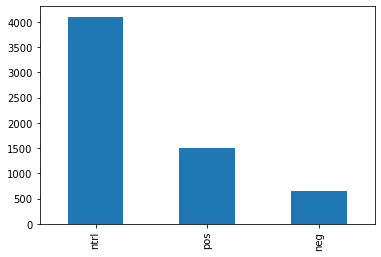

In [9]:
sentiments_using_textblob.value_counts().plot(kind = 'bar')
plt.show()

TextBlob gives us more negative sentiments than SIA, so we will prefer textblob, since classfication seems better.

In [10]:
tweets_df['sentiment'] = sentiments_using_textblob
tweets_df.head(100)

,tweets,sentiment
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl
4,The number of Covid -19 cases will soon reach ...,ntrl
...,...,...
95,RT @PoliceSynergie: Que n’aurait-on pas entend...,ntrl
96,RT @lahistoriaec: Grave situación en #Riobamba...,pos
97,"RT @YogyakartaCity: Nikah Bareng di Bantul, P...",ntrl
98,"RT @souguereira: Pergunta feita em Recife:\n""P...",ntrl


## <a id='3'>3. Text Pre-processing</a> 
### <a id='3A'>A. Pre-processing 'Key Words'</a>
#### <a id='3Aa'>a. Removing '@names'</a>
Here we can see that at many places we have '@names', which is of no use, since it don't have any meaning, So needs to be removed.

In [11]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [13]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df['tweets'], "@[\w]*: | *RT*")
tweets_df.head(10)

,tweets,sentiment,tidy_tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenV...
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ..."
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testée...
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...
5,Covid-19: Bid submission for TOT-4 auction def...,ntrl,Covid-19: Bid submission for TOT-4 auction def...
6,RT @ShahidAK1226: (Khidmat e Khalq Team Kandi ...,neg,"(Khidmat e Khalq Team Kandi Kotranka, now sta..."
7,10.000 dj's draaien wereldwijd muziek voor vac...,ntrl,10.000 dj's draaien wereldwijd muziek voor vac...
8,RT @cjwerleman: Indian Occupation Forces are k...,ntrl,Indian Occupation Forces are killing and thre...
9,RT @IAIM_VE: #BuenosDías✈|| ¡La gran familia ...,ntrl,#BuenosDías✈|| ¡La gran familia aeroportuari...


Seems good, now we don't have '@name' values

#### <a id='3Ab'>b. Removing links (http | https)</a>

In [14]:
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

tweets_df['tidy_tweets'] = cleaned_tweets
tweets_df.head(10)

,tweets,sentiment,tidy_tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenVSMbo...
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ग..."
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testées...
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...
5,Covid-19: Bid submission for TOT-4 auction def...,ntrl,Covid-19: Bid submission for TOT-4 auction def...
6,RT @ShahidAK1226: (Khidmat e Khalq Team Kandi ...,neg,"(Khidmat e Khalq Team Kandi Kotranka, now star..."
7,10.000 dj's draaien wereldwijd muziek voor vac...,ntrl,10.000 dj's draaien wereldwijd muziek voor vac...
8,RT @cjwerleman: Indian Occupation Forces are k...,ntrl,Indian Occupation Forces are killing and threa...
9,RT @IAIM_VE: #BuenosDías✈|| ¡La gran familia ...,ntrl,#BuenosDías✈|| ¡La gran familia aeroportuaria ...


#### <a id='3Ac'>c. Removing tweets with empty text</a>

In [15]:
tweets_df = tweets_df[tweets_df['tidy_tweets']!='']
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenVSMbo...
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ग..."
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testées...
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...


#### <a id='3Ad'>d. Dropping duplicate rows</a>

In [16]:
tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenVSMbo...
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ग..."
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testées...
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...


#### <a id='3Ae'>e. Resetting index</a>
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [17]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenVSMbo...
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ग..."
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testées...
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...


#### <a id='3Af'>f. Removing Punctuations, Numbers and Special characters</a>
This step should not be followed if we also want to do sentiment analysis on __key phrases__ as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on __key words__.

In [18]:
tweets_df['absolute_tidy_tweets'] = tweets_df['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

#### <a id='3Ag'>g. Removing Stop words</a>
With the same reason we mentioned above, we won't perform this on 'tidy_tweets' column, because it needs to be used for __key_phrases__ sentiment analysis.

In [19]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
tweets_df['absolute_tidy_tweets'] = cleaned_tweets
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenVSMbo...,Enjoy day
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ग...",WHO
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...,SilverTerrier gang uses COVID lures BEC attack...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testées...,Covid Avec nouvelles personnes testes positive...
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...,The number Covid cases soon reach number DJs C...
5,Covid-19: Bid submission for TOT-4 auction def...,ntrl,Covid-19: Bid submission for TOT-4 auction def...,Covid Bid submission TOT auction deferred via ...
6,RT @ShahidAK1226: (Khidmat e Khalq Team Kandi ...,neg,"(Khidmat e Khalq Team Kandi Kotranka, now star...",Khidmat e Khalq Team Kandi Kotranka started di...
7,10.000 dj's draaien wereldwijd muziek voor vac...,ntrl,10.000 dj's draaien wereldwijd muziek voor vac...,djs draaien wereldwijd muziek voor vaccin tege...
8,RT @cjwerleman: Indian Occupation Forces are k...,ntrl,Indian Occupation Forces are killing and threa...,Indian Occupation Forces killing threatening m...
9,RT @IAIM_VE: #BuenosDías✈|| ¡La gran familia ...,ntrl,#BuenosDías✈|| ¡La gran familia aeroportuaria ...,La gran familia aeroportuaria del IAIMVE les d...


#### <a id='3Ah'>h. Tokenize *'absolute_tidy_tweets'*</a>  

In [20]:
tokenized_tweet = tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                         [Enjoy, day]
1                                                [WHO]
2    [SilverTerrier, gang, uses, COVID, lures, BEC,...
3    [Covid, Avec, nouvelles, personnes, testes, po...
4    [The, number, Covid, cases, soon, reach, numbe...
Name: absolute_tidy_tweets, dtype: object

#### <a id='3Ai'>i. Converting words to Lemma</a>

In [21]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0                                         [Enjoy, day]
1                                                [WHO]
2    [SilverTerrier, gang, us, COVID, lure, BEC, at...
3    [Covid, Avec, nouvelles, personnes, testis, po...
4    [The, number, Covid, case, soon, reach, number...
Name: absolute_tidy_tweets, dtype: object

#### <a id='3Aj'>j. Joining all tokens into sentences</a>

In [22]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['absolute_tidy_tweets'] = tokenized_tweet
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenVSMbo...,Enjoy day
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ग...",WHO
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...,SilverTerrier gang us COVID lure BEC attack he...
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testées...,Covid Avec nouvelles personnes testis positive...
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...,The number Covid case soon reach number DJs Co...
5,Covid-19: Bid submission for TOT-4 auction def...,ntrl,Covid-19: Bid submission for TOT-4 auction def...,Covid Bid submission TOT auction deferred via ...
6,RT @ShahidAK1226: (Khidmat e Khalq Team Kandi ...,neg,"(Khidmat e Khalq Team Kandi Kotranka, now star...",Khidmat e Khalq Team Kandi Kotranka started di...
7,10.000 dj's draaien wereldwijd muziek voor vac...,ntrl,10.000 dj's draaien wereldwijd muziek voor vac...,dj draaien wereldwijd muziek voor vaccin tegen...
8,RT @cjwerleman: Indian Occupation Forces are k...,ntrl,Indian Occupation Forces are killing and threa...,Indian Occupation Forces killing threatening m...
9,RT @IAIM_VE: #BuenosDías✈|| ¡La gran familia ...,ntrl,#BuenosDías✈|| ¡La gran familia aeroportuaria ...,La gran familia aeroportuaria del IAIMVE le de...


### <a id='3B'>B. Pre-processing 'Key Phrases'</a> 

#### <a id='3Bc'>c. New feature called 'key_phrases', will contain phrases for corresponding tweet</a>

In obtained key phrases, we can see words like 'year', 'talk', 'appl', 'compan' etc. are present which should never be considered as key phrases. There is one other simple way to extract key phrases, by using TextBlob (ConllExtractor).

In [23]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in tweets_df.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[[],
 ["' आरोग्य सेतु",
  "' का कमाल",
  'who भी हुआ प्रभावित',
  'गरीब देशों के लिए लॉन्च करेगा ऐसा ही ऐप'],
 ['silverterrier gang'],
 ['covid-19',
  'avec 40 nouvelles personnes testées positives',
  'ladc dépasse la barre de 900 cas'],
 ['covid', 'dj', 'country'],
 ['covid-19', 'bid submission', 'tot-4 auction'],
 ['khidmat e khalq team kandi kotranka', 'iftaar'],
 ['draaien wereldwijd muziek voor vaccin tegen covid-19'],
 ['indian occupation forces', 'kashmir', 'covid-19 p…'],
 ['¡la gran familia aeroportuaria del',
  'iaim_ve les desea muy buenos días',
  'quédate',
  'tu casa']]

These key phrases seems better, let's consider these key phrase only.

In [24]:
tweets_df['key_phrases'] = textblob_key_phrases
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets,key_phrases
0,RT @Diegochuene: Enjoy your day #Johustlebu...,pos,Enjoy your day #Johustleburg #SteenhuisenVSMbo...,Enjoy day,[]
1,"RT @ZeeNews: 'आरोग्य सेतु' का कमाल, @WHO भी हु...",ntrl,"'आरोग्य सेतु' का कमाल, @WHO भी हुआ प्रभावित, ग...",WHO,"[' आरोग्य सेतु, ' का कमाल, who भी हुआ प्रभावित..."
2,SilverTerrier gang uses COVID-19 lures in BEC ...,ntrl,SilverTerrier gang uses COVID-19 lures in BEC ...,SilverTerrier gang us COVID lure BEC attack he...,[silverterrier gang]
3,RT @7sur7_cd: Covid-19 : Avec 40 nouvelles per...,ntrl,Covid-19 : Avec 40 nouvelles personnes testées...,Covid Avec nouvelles personnes testis positive...,"[covid-19, avec 40 nouvelles personnes testées..."
4,The number of Covid -19 cases will soon reach ...,ntrl,The number of Covid -19 cases will soon reach ...,The number Covid case soon reach number DJs Co...,"[covid, dj, country]"
5,Covid-19: Bid submission for TOT-4 auction def...,ntrl,Covid-19: Bid submission for TOT-4 auction def...,Covid Bid submission TOT auction deferred via ...,"[covid-19, bid submission, tot-4 auction]"
6,RT @ShahidAK1226: (Khidmat e Khalq Team Kandi ...,neg,"(Khidmat e Khalq Team Kandi Kotranka, now star...",Khidmat e Khalq Team Kandi Kotranka started di...,"[khidmat e khalq team kandi kotranka, iftaar]"
7,10.000 dj's draaien wereldwijd muziek voor vac...,ntrl,10.000 dj's draaien wereldwijd muziek voor vac...,dj draaien wereldwijd muziek voor vaccin tegen...,[draaien wereldwijd muziek voor vaccin tegen c...
8,RT @cjwerleman: Indian Occupation Forces are k...,ntrl,Indian Occupation Forces are killing and threa...,Indian Occupation Forces killing threatening m...,"[indian occupation forces, kashmir, covid-19 p…]"
9,RT @IAIM_VE: #BuenosDías✈|| ¡La gran familia ...,ntrl,#BuenosDías✈|| ¡La gran familia aeroportuaria ...,La gran familia aeroportuaria del IAIMVE le de...,"[¡la gran familia aeroportuaria del, iaim_ve l..."


## <a id='4'>4. Story Generation and Visualization</a>

#### <a id='4A'>A. Most common words in positive tweets</a>
Answer can be best found using WordCloud

In [25]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

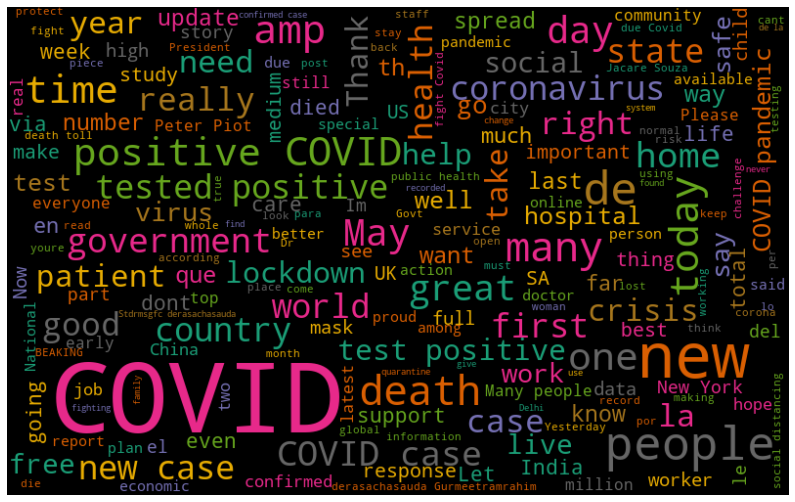

In [26]:
all_words = ' '.join([text for text in tweets_df['absolute_tidy_tweets'][tweets_df.sentiment == 'pos']])
generate_wordcloud(all_words)

#### <a id='4B'>B. Most common words in negative tweets</a>

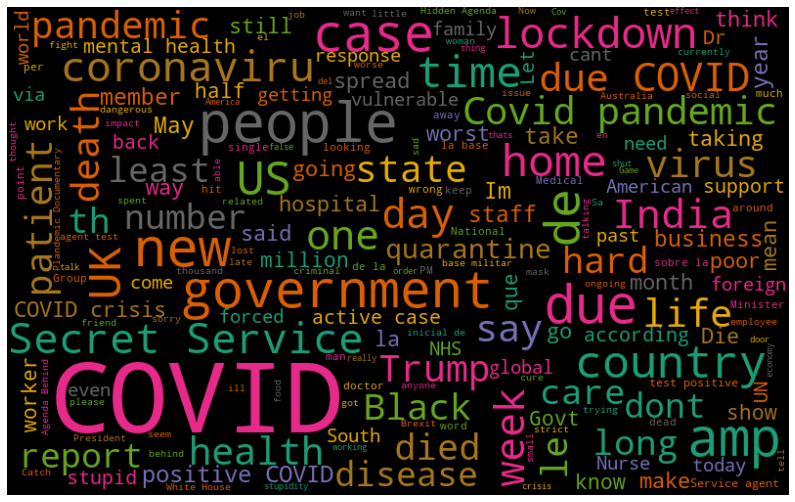

In [27]:
all_words = ' '.join([text for text in tweets_df['absolute_tidy_tweets'][tweets_df.sentiment == 'neg']])
generate_wordcloud(all_words)

- One thing to notice here is that word _'deep learning'_ has been used more than _'Machine Learning', 'AI', 'Artificial Intelligence', 'BigData'_ and _'DataScience'_, which shows the buzz of deep learning these days.

- AI, DeepLearning and MachineLearning have clearly been used in both positive and negative tweets, which is very obvious.
However, in negative tweets we can also see negative words as well like *stop, wrong, Unfortunately, fall, Cancer, shit, Greed, pressure, problem, complex, biased, never etc.*

#### <a id='4C'>C. Most commonly used Hashtags</a>

In [28]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [29]:
hashtags = hashtag_extract(tweets_df['tidy_tweets'])
hashtags = sum(hashtags, [])

c:\users\wahib\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wahib\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


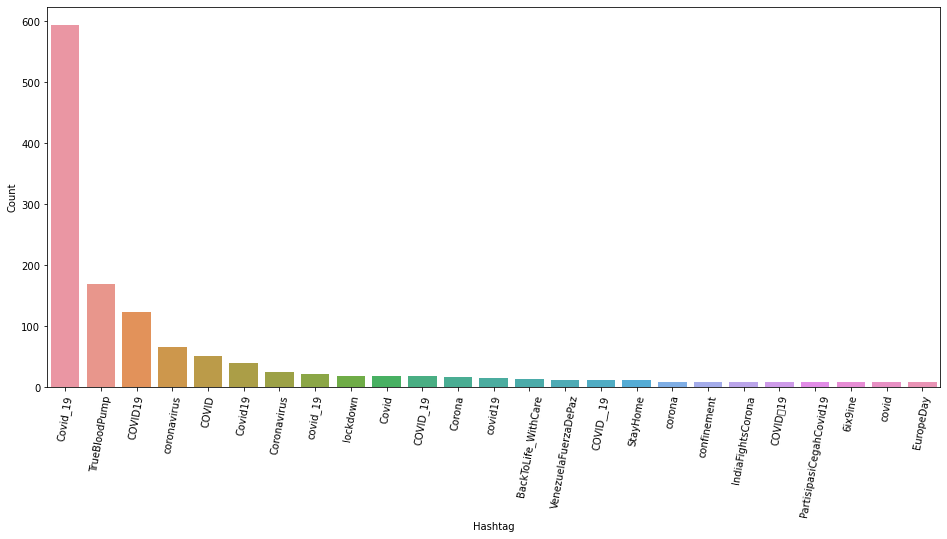

In [30]:
generate_hashtag_freqdist(hashtags)

As expected, AI, DeepLearning and MachineLearning are most common hashtags.

In [31]:
# For sake of consistency, we are going to discard the records which contains no phrases i.e where tweets_df['key_phrases'] contains []
tweets_df2 = tweets_df[tweets_df['key_phrases'].str.len()>0]

## <a id='5'>5. Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

Check out my below kernel to properly understand these techniques:<br/>
__https://www.kaggle.com/amar09/text-pre-processing-and-feature-extraction__

### <a id='5A'>A. Feature Extraction for 'Key Words'</a>

In [32]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

### <a id='5B'>B. Feature Extraction for 'Key Phrases'</a>

In [33]:
phrase_sents = tweets_df2['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

## <a id='6'>6. Model Building: Sentiment Analysis</a>

#### Map target variables to  {0, 1}

In [34]:
target_variable = tweets_df2['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

In [35]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

In [36]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    print(f'report - { classification_report(y_test, predictions) }')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

### <a id='6A'>A. Predictions on 'key words' based features</a>

#### <a id='6Aa'>a. BOW word features</a>

Accuracy Score - 0.7912341407151096
report -               precision    recall  f1-score   support

           0       0.21      0.37      0.26       178
           1       0.92      0.84      0.88      1556

    accuracy                           0.79      1734
   macro avg       0.56      0.60      0.57      1734
weighted avg       0.85      0.79      0.82      1734



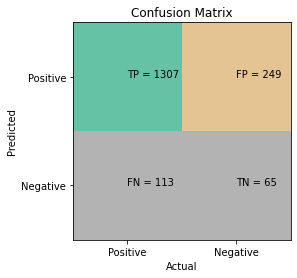

In [37]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

#### <a id='6Ab'>b. TF-IDF word features</a>

Accuracy Score - 0.7883506343713956
report -               precision    recall  f1-score   support

           0       0.19      0.31      0.23       178
           1       0.91      0.84      0.88      1556

    accuracy                           0.79      1734
   macro avg       0.55      0.58      0.56      1734
weighted avg       0.84      0.79      0.81      1734



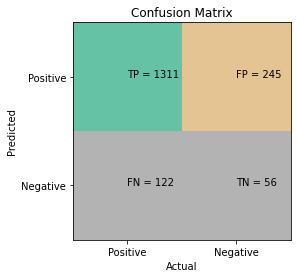

In [38]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

### <a id='6B'>B. Predictions on 'key phrases' based features</a>

#### <a id='6Ba'>a. BOW Phrase features</a>

Accuracy Score - 0.7716262975778547
report -               precision    recall  f1-score   support

           0       0.22      0.49      0.31       178
           1       0.93      0.80      0.86      1556

    accuracy                           0.77      1734
   macro avg       0.58      0.65      0.58      1734
weighted avg       0.86      0.77      0.81      1734



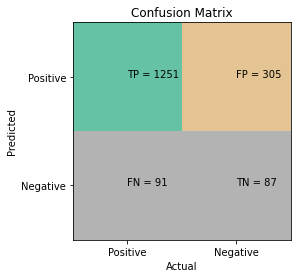

In [39]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

#### <a id='6Bb'>b. TF-IDF Phrase features</a>

Accuracy Score - 0.7687427912341407
report -               precision    recall  f1-score   support

           0       0.21      0.46      0.29       178
           1       0.93      0.80      0.86      1556

    accuracy                           0.77      1734
   macro avg       0.57      0.63      0.58      1734
weighted avg       0.86      0.77      0.80      1734



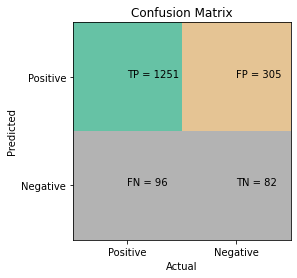

In [40]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

Features extracted from 'key words' helps model in performing better. They have better positive predictions than the later one. However, using 'key-phrase' based features improves the negative predictions.<br/><br/>
__This is it from my side, suggestions are always welcome. Thanks :)__

In [41]:
def logisticRegression_model(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train.toarray(), y_train)
    # predictions over test set
    predictions = logreg.predict(X_test.toarray())
    # calculating Accuracy Score
    print(f'logitic regression Accuracy Score - {accuracy_score(y_test, predictions)}')
    print(f'report - { classification_report(y_test, predictions) }')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

In [ ]:
prediction on key words:

logitic regression Accuracy Score - 0.9146482122260668
report -               precision    recall  f1-score   support

           0       0.78      0.24      0.36       178
           1       0.92      0.99      0.95      1556

    accuracy                           0.91      1734
   macro avg       0.85      0.61      0.66      1734
weighted avg       0.90      0.91      0.89      1734



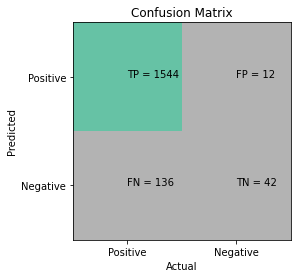

In [42]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
logisticRegression_model(X_train, X_test, y_train, y_test)

logitic regression Accuracy Score - 0.8979238754325259
report -               precision    recall  f1-score   support

           0       0.67      0.01      0.02       178
           1       0.90      1.00      0.95      1556

    accuracy                           0.90      1734
   macro avg       0.78      0.51      0.48      1734
weighted avg       0.87      0.90      0.85      1734



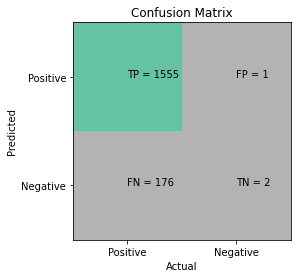

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
logisticRegression_model(X_train, X_test, y_train, y_test)

In [ ]:
prediction on key phrases:

logitic regression Accuracy Score - 0.9083044982698962
report -               precision    recall  f1-score   support

           0       0.73      0.17      0.27       178
           1       0.91      0.99      0.95      1556

    accuracy                           0.91      1734
   macro avg       0.82      0.58      0.61      1734
weighted avg       0.89      0.91      0.88      1734



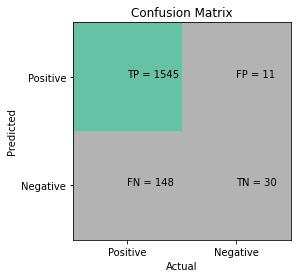

In [44]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
logisticRegression_model(X_train, X_test, y_train, y_test)

logitic regression Accuracy Score - 0.9002306805074971
report -               precision    recall  f1-score   support

           0       0.86      0.03      0.06       178
           1       0.90      1.00      0.95      1556

    accuracy                           0.90      1734
   macro avg       0.88      0.52      0.51      1734
weighted avg       0.90      0.90      0.86      1734



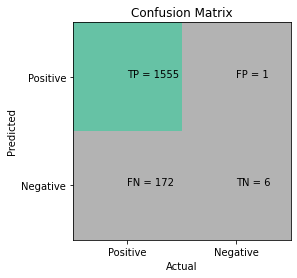

In [45]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
logisticRegression_model(X_train, X_test, y_train, y_test)

In [46]:
def svm_model(X_train, X_test, y_train, y_test):
    svm = LinearSVC()
    svm.fit(X_train.toarray(), y_train)
    # predictions over test set
    predictions = svm.predict(X_test.toarray())
    # calculating Accuracy Score
    print(f'SVM Accuracy Score - {accuracy_score(y_test, predictions)}')
    print(f'report - { classification_report(y_test, predictions) }')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

In [ ]:
prediction on key words:

SVM Accuracy Score - 0.9065743944636678
report -               precision    recall  f1-score   support

           0       0.57      0.38      0.46       178
           1       0.93      0.97      0.95      1556

    accuracy                           0.91      1734
   macro avg       0.75      0.67      0.70      1734
weighted avg       0.89      0.91      0.90      1734



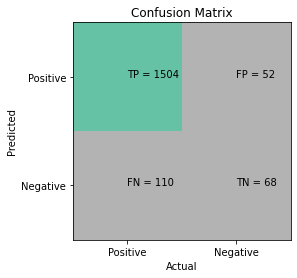

In [47]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
svm_model(X_train, X_test, y_train, y_test)

SVM Accuracy Score - 0.9186851211072664
report -               precision    recall  f1-score   support

           0       0.78      0.29      0.42       178
           1       0.92      0.99      0.96      1556

    accuracy                           0.92      1734
   macro avg       0.85      0.64      0.69      1734
weighted avg       0.91      0.92      0.90      1734



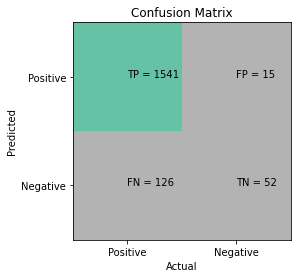

In [48]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
svm_model(X_train, X_test, y_train, y_test)

In [ ]:
prediction on key phrases:

SVM Accuracy Score - 0.8967704728950404
report -               precision    recall  f1-score   support

           0       0.50      0.35      0.41       178
           1       0.93      0.96      0.94      1556

    accuracy                           0.90      1734
   macro avg       0.71      0.66      0.68      1734
weighted avg       0.88      0.90      0.89      1734



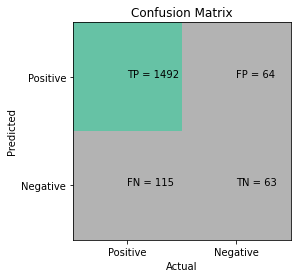

In [49]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
svm_model(X_train, X_test, y_train, y_test)

SVM Accuracy Score - 0.9059976931949251
report -               precision    recall  f1-score   support

           0       0.58      0.30      0.40       178
           1       0.92      0.97      0.95      1556

    accuracy                           0.91      1734
   macro avg       0.75      0.64      0.67      1734
weighted avg       0.89      0.91      0.89      1734



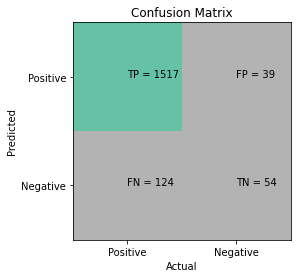

In [50]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
svm_model(X_train, X_test, y_train, y_test)

In [51]:
def KNN_model(X_train, X_test, y_train, y_test):
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train.toarray(), y_train)
    # predictions over test set
    predictions = KNN.predict(X_test.toarray())
    # calculating Accuracy Score
    print(f'KNN Accuracy Score - {accuracy_score(y_test, predictions)}')
    print(f'report - { classification_report(y_test, predictions) }')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

In [ ]:
prediction on key words:

KNN Accuracy Score - 0.9019607843137255
report -               precision    recall  f1-score   support

           0       0.90      0.05      0.10       178
           1       0.90      1.00      0.95      1556

    accuracy                           0.90      1734
   macro avg       0.90      0.52      0.52      1734
weighted avg       0.90      0.90      0.86      1734



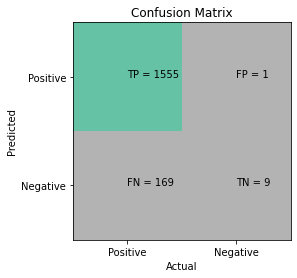

In [52]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
KNN_model(X_train, X_test, y_train, y_test)

KNN Accuracy Score - 0.9019607843137255
report -               precision    recall  f1-score   support

           0       0.90      0.05      0.10       178
           1       0.90      1.00      0.95      1556

    accuracy                           0.90      1734
   macro avg       0.90      0.52      0.52      1734
weighted avg       0.90      0.90      0.86      1734



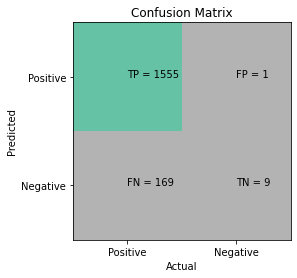

In [53]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
KNN_model(X_train, X_test, y_train, y_test)

In [ ]:
prediction on key phrases:

KNN Accuracy Score - 0.9036908881199539
report -               precision    recall  f1-score   support

           0       0.72      0.10      0.18       178
           1       0.91      1.00      0.95      1556

    accuracy                           0.90      1734
   macro avg       0.81      0.55      0.56      1734
weighted avg       0.89      0.90      0.87      1734



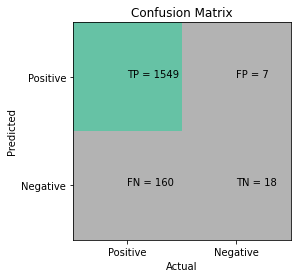

In [54]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
KNN_model(X_train, X_test, y_train, y_test)

KNN Accuracy Score - 0.9008073817762399
report -               precision    recall  f1-score   support

           0       0.59      0.11      0.18       178
           1       0.91      0.99      0.95      1556

    accuracy                           0.90      1734
   macro avg       0.75      0.55      0.56      1734
weighted avg       0.87      0.90      0.87      1734



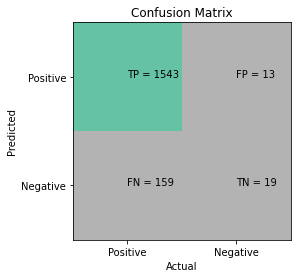

In [55]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
KNN_model(X_train, X_test, y_train, y_test)